In [1]:
# Import Libraries
import pandas as pd
import glob
import os

# Function to Load Dataset
def load_dataset(folder_path):
    """
    Load all CSV files from a folder into a single DataFrame.
    Adds a 'subject' column based on file name.
    """
    all_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = []
    
    for file in all_files:
        df = pd.read_csv(file)
        # Add a 'subject' column
        df['subject'] = os.path.basename(file).split('.')[0]
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)


# Label Dictionaries
harth_labels = {
    1: "walking",
    2: "running",
    3: "shuffling",
    4: "stairs (ascending)",
    5: "stairs (descending)",
    6: "standing",
    7: "sitting",
    8: "lying",
    13: "cycling (sit)",
    14: "cycling (stand)",
    130: "cycling (sit, inactive)",
    140: "cycling (stand, inactive)"
}

har70plus_labels = {
    1: "walking",
    3: "shuffling",
    4: "stairs (ascending)",
    5: "stairs (descending)",
    6: "standing",
    7: "sitting",
    8: "lying"
}

walking_speed_labels = {
    2: "running",
    101: "slow-walking (≤4 km/h)",
    102: "moderate-walking (4.1-5.4 km/h)",
    103: "brisk-walking (≥5.5 km/h)"
}


# Set Dataset Paths
harth_path = './harth/'                 
har70plus_path = './har70plus/'         
walking_speed_path = './adult_walking_speed/'  


# Load Each Dataset Separately
harth_df = load_dataset(harth_path)
har70plus_df = load_dataset(har70plus_path)
walking_speed_df = load_dataset(walking_speed_path)


# Add Dataset + Activity Columns
harth_df['dataset'] = 'HARTH'
har70plus_df['dataset'] = 'HAR70+'
walking_speed_df['dataset'] = 'WalkingSpeed'

harth_df['activity'] = harth_df['label'].map(harth_labels)
har70plus_df['activity'] = har70plus_df['label'].map(har70plus_labels)
walking_speed_df['activity'] = walking_speed_df['label'].map(walking_speed_labels)


# Inspect DataFrames
print("HARTH Dataset:")
display(harth_df.head())

print("HAR70+ Dataset:")
display(har70plus_df.head())

print("Walking Speed Dataset:")
display(walking_speed_df.head())


print("HARTH subjects:", harth_df['subject'].nunique())
print("HAR70+ subjects:", har70plus_df['subject'].nunique())
print("Walking Speed subjects:", walking_speed_df['subject'].nunique())

print("\nHARTH activity counts:")
print(harth_df['activity'].value_counts())

print("\nHAR70+ activity counts:")
print(har70plus_df['activity'].value_counts())

print("\nWalking Speed activity counts:")
print(walking_speed_df['activity'].value_counts())



HARTH Dataset:


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,subject,index,dataset,activity
0,2019-01-12 00:00:00.000,-0.982201,-0.031251,0.178300,-0.935149,-0.006160,0.358898,6,S016,NaN,HARTH,standing
1,2019-01-12 00:00:00.020,-0.973421,-0.042747,0.190618,-0.934986,-0.040489,0.366376,6,S016,NaN,HARTH,standing
2,2019-01-12 00:00:00.040,-0.977409,-0.033531,0.185584,-0.939761,-0.028617,0.370106,6,S016,NaN,HARTH,standing
3,2019-01-12 00:00:00.060,-0.974620,-0.034506,0.188868,-0.939667,-0.036060,0.369624,6,S016,NaN,HARTH,standing
4,2019-01-12 00:00:00.080,-0.976828,-0.041577,0.186524,-0.946145,-0.030512,0.363411,6,S016,NaN,HARTH,standing


HAR70+ Dataset:


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,subject,dataset,activity
0,2021-06-11 10:24:37.958,-0.978027,-0.223633,0.049561,-0.992676,0.125000,-0.152100,6,518,HAR70+,standing
1,2021-06-11 10:24:37.979,-0.975830,-0.223633,0.065430,-1.003906,0.125000,-0.152100,6,518,HAR70+,standing
2,2021-06-11 10:24:37.999,-0.975830,-0.223633,0.057373,-1.008545,0.123535,-0.150635,6,518,HAR70+,standing
3,2021-06-11 10:24:38.019,-0.976318,-0.222900,0.042969,-0.994141,0.133057,-0.158691,6,518,HAR70+,standing
4,2021-06-11 10:24:38.039,-0.972656,-0.226807,0.049561,-0.996338,0.135986,-0.170166,6,518,HAR70+,standing


Walking Speed Dataset:


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,subject,dataset,activity
0,2021-05-12 08:45:33.146,-1.0,-0.062256,-0.437500,-0.968750,-0.226318,0.015625,101,23,WalkingSpeed,slow-walking (≤4 km/h)
1,2021-05-12 08:45:33.166,-1.0,-0.042969,-0.435303,-0.968750,-0.236328,0.015625,101,23,WalkingSpeed,slow-walking (≤4 km/h)
2,2021-05-12 08:45:33.187,-1.0,-0.029297,-0.419678,-0.968750,-0.234375,0.015625,101,23,WalkingSpeed,slow-walking (≤4 km/h)
3,2021-05-12 08:45:33.207,-1.0,-0.031250,-0.424072,-0.970215,-0.232666,0.015625,101,23,WalkingSpeed,slow-walking (≤4 km/h)
4,2021-05-12 08:45:33.227,-1.0,-0.030762,-0.442627,-0.961182,-0.240234,0.014160,101,23,WalkingSpeed,slow-walking (≤4 km/h)


HARTH subjects: 31
HAR70+ subjects: 18
Walking Speed subjects: 24

HARTH activity counts:
activity
sitting                      3286662
walking                      1716985
standing                     1260598
lying                         588036
cycling (sit)                 511121
running                       345534
shuffling                     316918
stairs (ascending)             94991
stairs (descending)            87821
cycling (stand)                56126
cycling (sit, inactive)        41785
cycling (stand, inactive)       7865
Name: count, dtype: int64

HAR70+ activity counts:
activity
walking                1079312
sitting                 483452
standing                418055
lying                   203182
shuffling                66058
stairs (descending)       4978
stairs (ascending)        4560
Name: count, dtype: int64

Walking Speed activity counts:
activity
moderate-walking (4.1-5.4 km/h)    498960
slow-walking (≤4 km/h)             484800
brisk-walking (≥5.5 km/h)    

Matplotlib is building the font cache; this may take a moment.


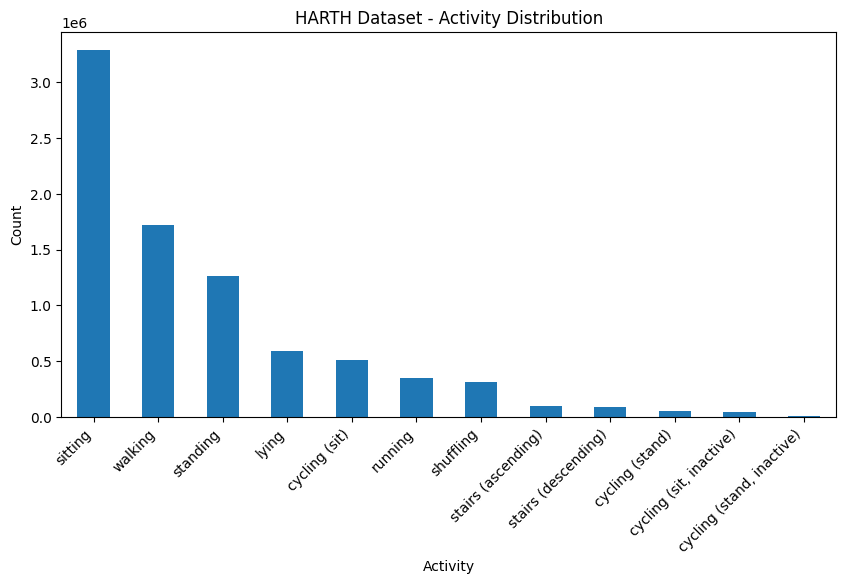

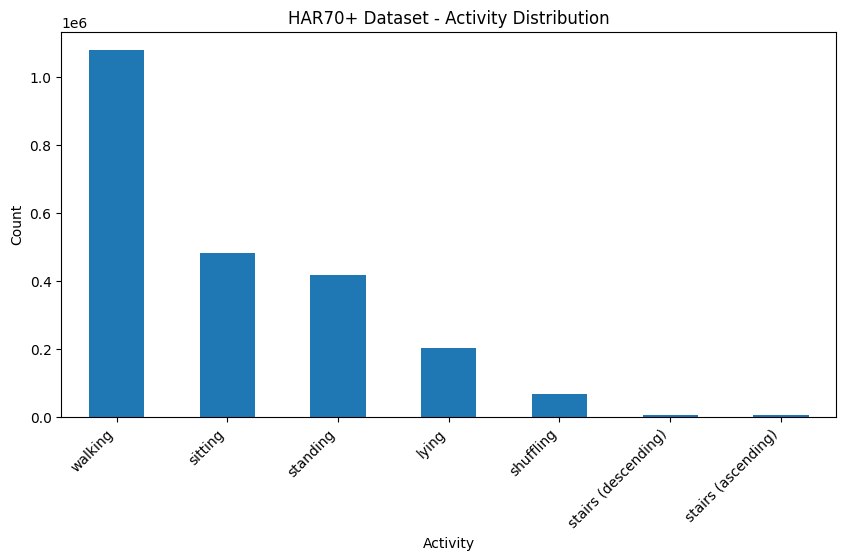

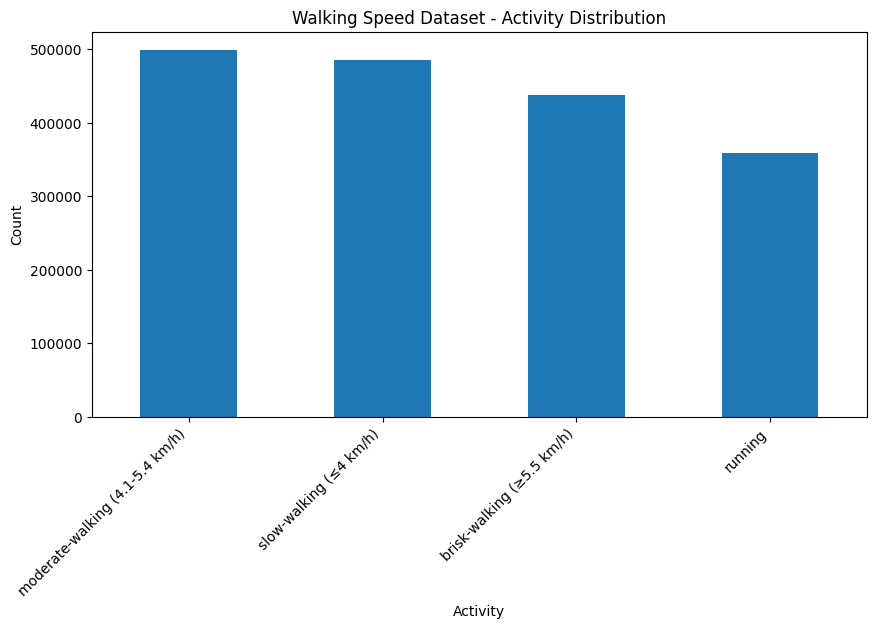

In [2]:
import matplotlib.pyplot as plt

# HARTH
plt.figure(figsize=(10,5))
harth_df['activity'].value_counts().plot(kind='bar')
plt.title("HARTH Dataset - Activity Distribution")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# HAR70+
plt.figure(figsize=(10,5))
har70plus_df['activity'].value_counts().plot(kind='bar')
plt.title("HAR70+ Dataset - Activity Distribution")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# Walking Speed
plt.figure(figsize=(10,5))
walking_speed_df['activity'].value_counts().plot(kind='bar')
plt.title("Walking Speed Dataset - Activity Distribution")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()
